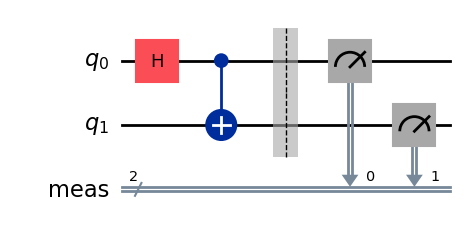

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

qc = QuantumCircuit(2)
qc.h(0)          # Apply Hadamard gate to qubit 0
qc.cx(0, 1)      # Apply CNOT gate (entangles qubits 0 and 1)
qc.measure_all() # Measure both qubits
qc.draw('mpl')


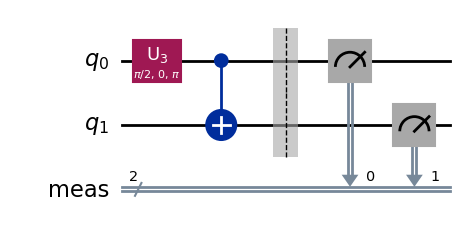

In [4]:
compiled_qc = transpile(qc, basis_gates=['u3', 'cx'], optimization_level=3)
compiled_qc.draw('mpl')


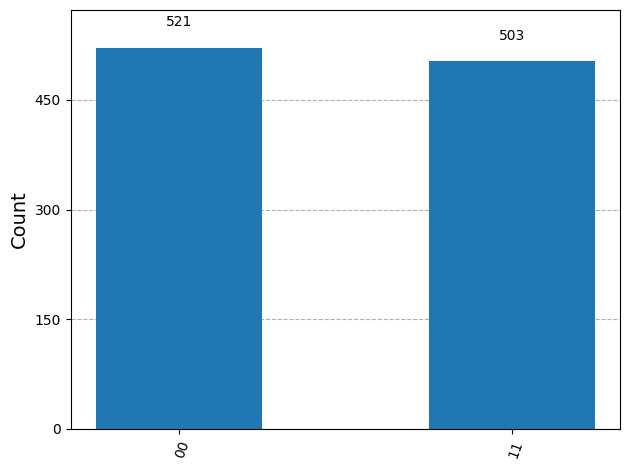

In [7]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(compiled_qc, simulator)  # Transpile for the simulator
job = simulator.run(compiled_circuit, shots=1024)     # Run with 1024 shots
result = job.result()                                # Get the result
counts = result.get_counts()                          # Get the counts
plot_histogram(counts)                                # Plot the histogram